Part 2: Model Creation
Create a model that can predict whether or not a student will pass the test. Use the provided data set to train your model and test its accuracy. You have free choice of programming language, algorithm, and tools.

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = f"{os.getcwd()}/../raw_data/test_data.tsv"
df = pd.read_csv(path, sep='\t')
df.head()

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,Japan,20,Juurou,Hayashi,10.578594,True,False,True,NaN
1,Male,Japanese,Japan,22,Ryūji,Yamasaki,7.814520,False,False,True,NaN
2,Male,Japanese,Japan,27,Ryūnosuke,Inoue,4.213682,False,False,True,NaN
3,Male,Japanese,Japan,24,Shin,Kobayashi,NaN,False,False,True,NaN
4,Female,Japanese,Japan,21,Ran,Ono,3.248907,False,False,False,NaN


## Cleaning

In [11]:
#remove duplicates 

df.drop_duplicates(inplace=True)

#missing values

df.isnull().sum().sort_values(ascending=False)/len(df) #NaN percentage for each column

#drop unnecessary columns

df = df.drop(['notes','first','last'],axis=1)

In [12]:
df

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
0,Male,Japanese,Japan,20,10.578594,True,False,True
1,Male,Japanese,Japan,22,7.814520,False,False,True
2,Male,Japanese,Japan,27,4.213682,False,False,True
3,Male,Japanese,Japan,24,NaN,False,False,True
4,Female,Japanese,Japan,21,3.248907,False,False,False
...,...,...,...,...,...,...,...,...
4995,Male,Japanese,Japan,29,3.291721,False,False,True
4996,Female,Japanese,Japan,22,1.590491,False,False,False
4997,Male,English,UK,25,5.029988,False,False,False
4998,Male,Japanese,Japan,22,1.730570,True,False,True


## Pre-processing

### Feature Imputation






In [13]:
from sklearn.impute import SimpleImputer

hours_imputer = SimpleImputer(strategy="mean") 

hours_imputer.fit(df[['hours_studied']]) # Fit imputer to hours column

df['hours_studied'] = hours_imputer.transform(df[['hours_studied']]) # Impute

df.head()


,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
0,Male,Japanese,Japan,20,10.578594,True,False,True
1,Male,Japanese,Japan,22,7.814520,False,False,True
2,Male,Japanese,Japan,27,4.213682,False,False,True
3,Male,Japanese,Japan,24,4.964076,False,False,True
4,Female,Japanese,Japan,21,3.248907,False,False,False


### Scaling 


In [14]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler() 

df['age'],df['hours_studied'] = rb_scaler.fit_transform(df[['age','hours_studied']]).T

df.head()

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
0,Male,Japanese,Japan,-0.4,4.254802,True,False,True
1,Male,Japanese,Japan,-0.2,2.160127,False,False,True
2,Male,Japanese,Japan,0.3,-0.568665,False,False,True
3,Male,Japanese,Japan,0.0,0.000000,False,False,True
4,Female,Japanese,Japan,-0.3,-1.299792,False,False,False


### Encoding


In [15]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse=False)

enginetype_ohe = ohe.fit_transform(df[['country', 'lang','sex']])

print(ohe.categories_) # Check the column order returned by the transformation

df['Australia'],df['Finland'],df['France'],df['Italy'],df['Japan'],df['Mexico'],df['New Zealand'],df['Spain'],df['UK'],df['USA'],df['English'],df['Finnish'],df['French'],df['Italian'],df['Japanese'],df['Spanish'],df['Female'], df['Male'] = enginetype_ohe.T

df.drop(columns=['country','lang', 'sex'], inplace = True)

df.head()

[array(['Australia', 'Finland', 'France', 'Italy', 'Japan', 'Mexico',
       'New Zealand', 'Spain', 'UK', 'USA'], dtype=object), array(['English', 'Finnish', 'French', 'Italian', 'Japanese', 'Spanish'],
      dtype=object), array(['Female', 'Male'], dtype=object)]


,age,hours_studied,dojo_class,test_prep,pass,Australia,Finland,France,Italy,Japan,...,UK,USA,English,Finnish,French,Italian,Japanese,Spanish,Female,Male
0,-0.4,4.254802,True,False,True,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.2,2.160127,False,False,True,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.3,-0.568665,False,False,True,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.000000,False,False,True,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.3,-1.299792,False,False,False,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
# CHeck imbalance
y.value_counts()

False    2665
True     2334
Name: pass, dtype: int64

### Holdout

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='pass')
y = df['pass']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

### Baseline 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


model = LogisticRegression()

scores = cross_val_score(model, train_X, train_y, cv=10)

baseline_score = scores.mean()

print(f"Baseline score is {baseline_score}")

Baseline score is 0.6439101604278076





### Feature Selection



In [18]:
from sklearn.inspection import permutation_importance

model = LogisticRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance']

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance


,feature,feature importance
2,dojo_class,0.0858852
0,age,0.015141
1,hours_studied,0.0135567
3,test_prep,0.00397279
14,English,0.00344869
13,USA,0.00103821
7,Italy,0.000870174
17,Italian,0.000870174
5,Finland,0.000676135
15,Finnish,0.000676135


### Model Testing and Tuning

In [19]:

#X = df[['dojo_class','age', 'hours_studied','test_prep']]

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)

strong_model_score = scores.mean()

strong_model_score

0.6553250501002005

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=40)
scores = cross_val_score(model, X, y, cv=10)
strong_model_score = scores.mean()

strong_model_score



0.6353314629258516

In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
            #    'min_samples_split': min_samples_split,
            #    'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False]}


In [24]:

# from scipy import stats

# # Instanciate model
# model = RandomForestClassifier()

# # Instanciate Random Search
# search = RandomizedSearchCV(
#     model, random_grid,
#     n_jobs=-1, cv=5, n_iter=100, verbose=1,random_state = 0)

# search = search.fit(X, y)
# search.best_estimator_
# print(search.best_score_)
# print(search.best_params_)

# #RandomForestClassifier best parameters: 
# # {'n_estimators': 1600,
# #  'max_features': 'auto',
# #  'max_depth': 10,
# #  'bootstrap': True}


In [23]:
# Running model with best parameters found by random search
model = RandomForestClassifier(n_estimators=1600,max_features='auto',max_depth=10,bootstrap=True)

scores = cross_val_score(model, X, y, cv=10)
best_model_score = scores.mean()

best_model_score



0.6727342685370742

## Model Evaluation

In [25]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [28]:
# Instantiate and fit the RandomForestClassifier
#model = RandomForestClassifier()
model.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, n_estimators=1600)

In [29]:
# Make predictions for the test set
y_pred_test = model.predict(val_X)

In [30]:
# View accuracy score
accuracy_score(val_y, y_pred_test)

0.7016

In [31]:
# View confusion matrix for test data and predictions
confusion_matrix(val_y, y_pred_test)

array([[513, 168],
       [205, 364]])

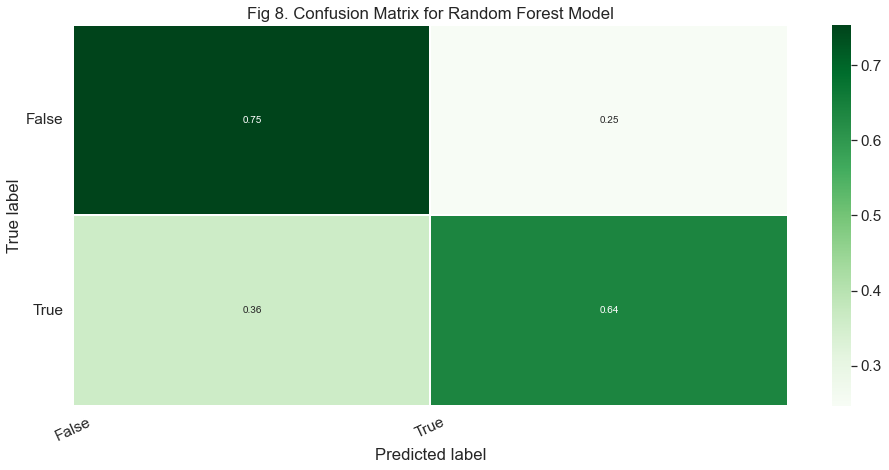

In [38]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(val_y, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['False', 'True']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Fig 8. Confusion Matrix for Random Forest Model')
plt.show()


In [40]:
# View the classification report for test data and predictions
print(classification_report(val_y, y_pred_test))

              precision    recall  f1-score   support

       False       0.71      0.75      0.73       681
        True       0.68      0.64      0.66       569

    accuracy                           0.70      1250
   macro avg       0.70      0.70      0.70      1250
weighted avg       0.70      0.70      0.70      1250

